In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
columns =["age","workclass","fnlwgt","education","education.num","marital.status","occupation","relationship","race","sex","capital.gain","capital.loss","hours.per.week","native.country","income"]
training_f = pd.read_csv("adult.data", sep=",\s", header = None, engine = 'python',names=columns)
testing_f = pd.read_csv("adult.test", sep=",\s", header = None, engine = 'python',names=columns)

testing_f['income'].replace(regex=True,inplace=True,to_replace=r'\.',value=r'')
data_f = pd.concat([testing_f,training_f])
data_f.reset_index(drop=True, inplace=True)
data_f

/var/folders/dc/5z3pbmdn0y7432jf8nxdqh9r0000gn/T/ipykernel_54335/2769581000.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  testing_f['income'].replace(regex=True,inplace=True,to_replace=r'\.',value=r'')


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,|1x3 Cross validator,None,NaN,None,NaN,None,None,None,None,None,NaN,NaN,NaN,None,None
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,27,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48839,40,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48840,58,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48841,22,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


In [11]:
data_f = data_f.drop(index=0)
data_f = data_f.reset_index(drop=True)
data_f

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48838,40,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48839,58,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48840,22,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


In [12]:
data_f.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

([<matplotlib.patches.Wedge at 0x14c0ea620>,
 [Text(0.13270858417163967, -1.0919653985759616, '<=50K'),
  Text(-0.13270853305305033, 1.0919654047884977, '>50K')],
 [Text(0.07238650045725799, -0.5956174901323427, '76.1%'),
  Text(-0.07238647257439108, 0.5956174935209987, '23.9%')])

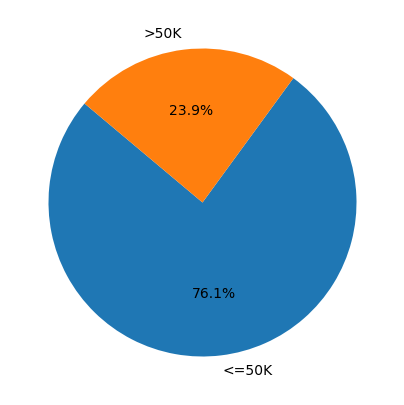

In [15]:
inc_amounts = data_f['income'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(inc_amounts, labels=inc_amounts.index, autopct='%1.1f%%', startangle=140)

76.1% has a salary greater than $50K and only 23.9% has a salary less than $50k , therefore it means that there is an imblanace in the dataset. 

In [16]:
data_f[data_f == '?'] = np.nan
data_f = data_f.dropna()
data_f

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
5,34,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48838,40,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48839,58,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48840,22,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


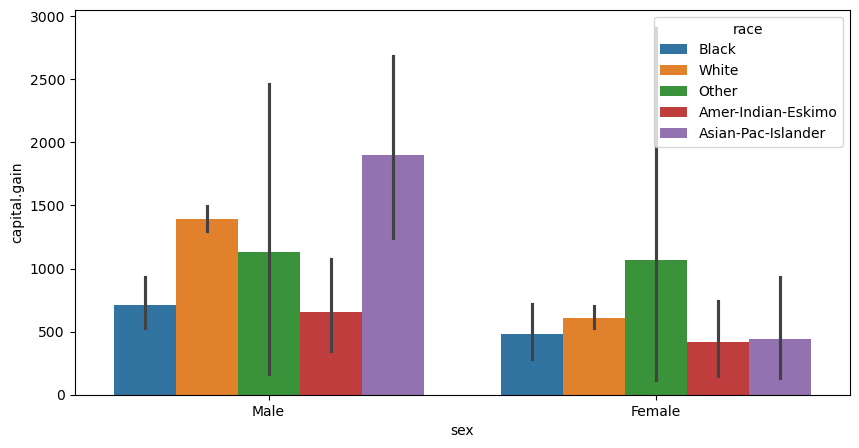

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x ='sex' , y='capital.gain', data = data_f,hue='race')
plt.xlabel=('Sex')
plt.ylabel=('Capital Gain')

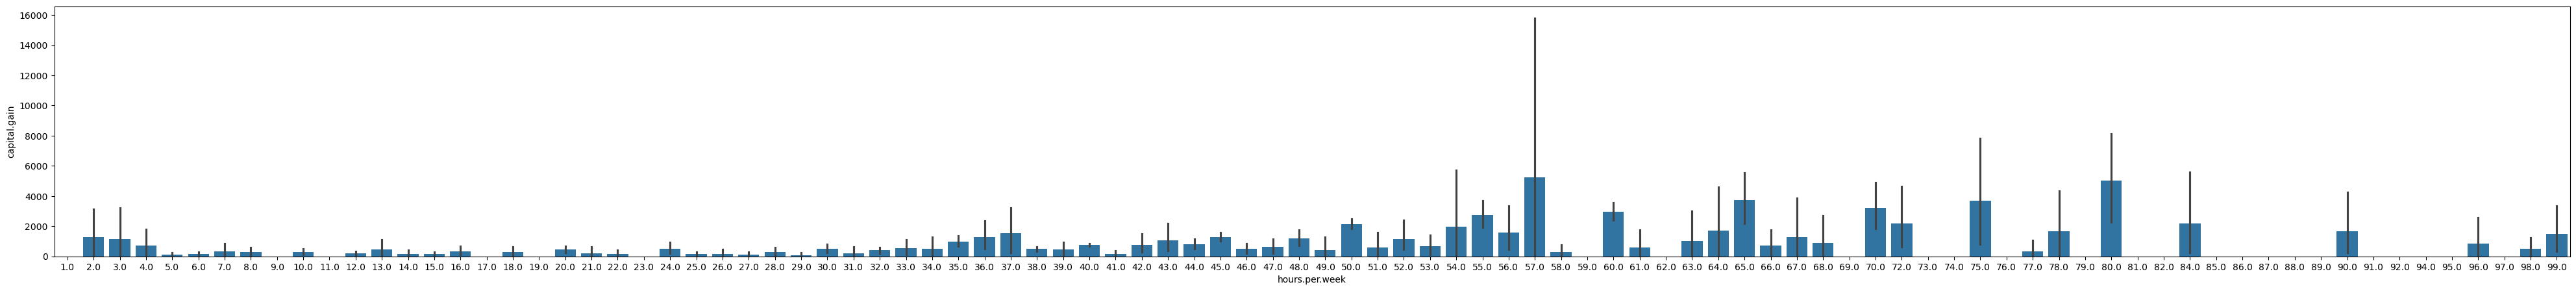

In [38]:
plt.figure(figsize=(50,5))
sns.barplot(x ='hours.per.week' , y='capital.gain', data = data_f)
plt.xlabel=('Sex')
plt.ylabel=('Capital Gain')

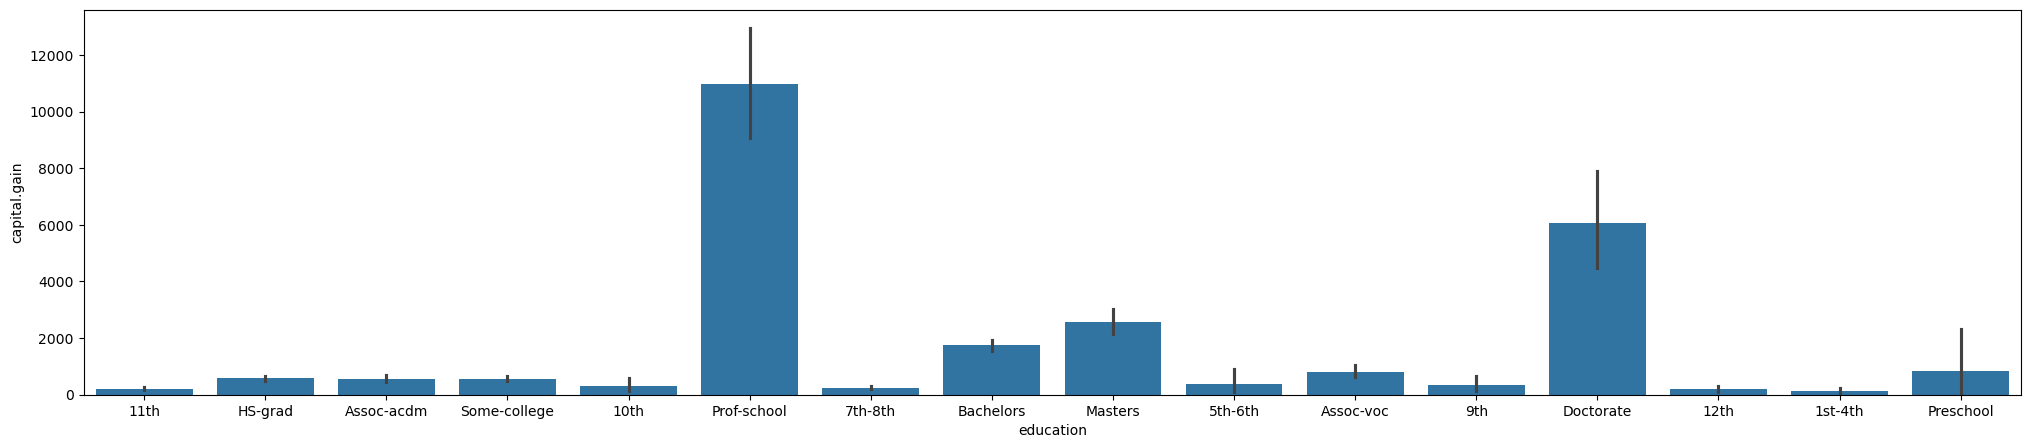

In [41]:
plt.figure(figsize=(25,5))
sns.barplot(x ='education' , y='capital.gain', data = data_f)
plt.xlabel=('Sex')
plt.ylabel=('Capital Gain')